In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 


from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [14]:
df = pd.read_csv('/kaggle/input/walmart/df_clean.csv')

In [15]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,week,month,year
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,A,151315,5,2,2010
1,1,2,2010-02-05,50605.27,False,42.31,2.572,211.096358,8.106,A,151315,5,2,2010
2,1,3,2010-02-05,13740.12,False,42.31,2.572,211.096358,8.106,A,151315,5,2,2010
3,1,4,2010-02-05,39954.04,False,42.31,2.572,211.096358,8.106,A,151315,5,2,2010
4,1,5,2010-02-05,32229.38,False,42.31,2.572,211.096358,8.106,A,151315,5,2,2010


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420212 entries, 0 to 420211
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         420212 non-null  int64  
 1   Dept          420212 non-null  int64  
 2   Date          420212 non-null  object 
 3   Weekly_Sales  420212 non-null  float64
 4   IsHoliday     420212 non-null  bool   
 5   Temperature   420212 non-null  float64
 6   Fuel_Price    420212 non-null  float64
 7   CPI           420212 non-null  float64
 8   Unemployment  420212 non-null  float64
 9   Type          420212 non-null  object 
 10  Size          420212 non-null  int64  
 11  week          420212 non-null  int64  
 12  month         420212 non-null  int64  
 13  year          420212 non-null  int64  
dtypes: bool(1), float64(5), int64(6), object(2)
memory usage: 42.1+ MB


In [17]:
df.drop(['Date'],axis = 1,inplace = True)

In [18]:
from sklearn.preprocessing import LabelEncoder

Lb = LabelEncoder()

df['Type']  = Lb.fit_transform(df['Type'])

In [19]:
# Split data into X and y
X = df.drop("Weekly_Sales", axis=1)

y = df["Weekly_Sales"]

In [20]:
X

,Store,Dept,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,week,month,year
0,1,1,False,42.31,2.572,211.096358,8.106,0,151315,5,2,2010
1,1,2,False,42.31,2.572,211.096358,8.106,0,151315,5,2,2010
2,1,3,False,42.31,2.572,211.096358,8.106,0,151315,5,2,2010
3,1,4,False,42.31,2.572,211.096358,8.106,0,151315,5,2,2010
4,1,5,False,42.31,2.572,211.096358,8.106,0,151315,5,2,2010
...,...,...,...,...,...,...,...,...,...,...,...,...
420207,45,93,False,58.85,3.882,192.308899,8.667,1,118221,43,10,2012
420208,45,94,False,58.85,3.882,192.308899,8.667,1,118221,43,10,2012
420209,45,95,False,58.85,3.882,192.308899,8.667,1,118221,43,10,2012
420210,45,97,False,58.85,3.882,192.308899,8.667,1,118221,43,10,2012


In [21]:
y

0         24924.50
1         50605.27
2         13740.12
3         39954.04
4         32229.38
            ...   
420207     2487.80
420208     5203.31
420209    56017.47
420210     6817.48
420211     1076.80
Name: Weekly_Sales, Length: 420212, dtype: float64

In [22]:
# Split data into train and test sets
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [23]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() 
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test)

In [25]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor

In [26]:
models = [
           ['Lasso: ', Lasso()],
           ['RandomForest ',RandomForestRegressor()]
           
         ]

In [27]:
# Run all the proposed models and update the information in a list model_data
import time
from math import sqrt
from sklearn.metrics import mean_squared_error
import sklearn.metrics as metrics
model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 42
    curr_model_data["Name"] = name
    start = time.time()
    curr_model.fit(X_train,y_train)
    end = time.time()
    curr_model_data["Train_Time"] = end - start
    curr_model_data["Train_R2_Score"] = metrics.r2_score(y_train,curr_model.predict(X_train))
    curr_model_data["Test_R2_Score"] = metrics.r2_score(y_test,curr_model.predict(X_test))
    curr_model_data["Test_RMSE_Score"] = sqrt(mean_squared_error(y_test,curr_model.predict(X_test)))
    model_data.append(curr_model_data)


In [28]:
model_data

[{'Name': 'Lasso: ',
  'Train_Time': 9.886137247085571,
  'Train_R2_Score': 0.08668204218286191,
  'Test_R2_Score': 0.08834186359055962,
  'Test_RMSE_Score': 21628.854702647386},
 {'Name': 'RandomForest ',
  'Train_Time': 209.85430335998535,
  'Train_R2_Score': 0.9965120991767749,
  'Test_R2_Score': 0.976449622254904,
  'Test_RMSE_Score': 3476.2936552267047}]

In [33]:
# Convert list to dataframe
df_models = pd.DataFrame(model_data)

In [34]:
df_models

,Name,Train_Time,Train_R2_Score,Test_R2_Score,Test_RMSE_Score
0,Lasso:,9.886137,0.086682,0.088342,21628.854703
1,RandomForest,209.854303,0.996512,0.976450,3476.293655


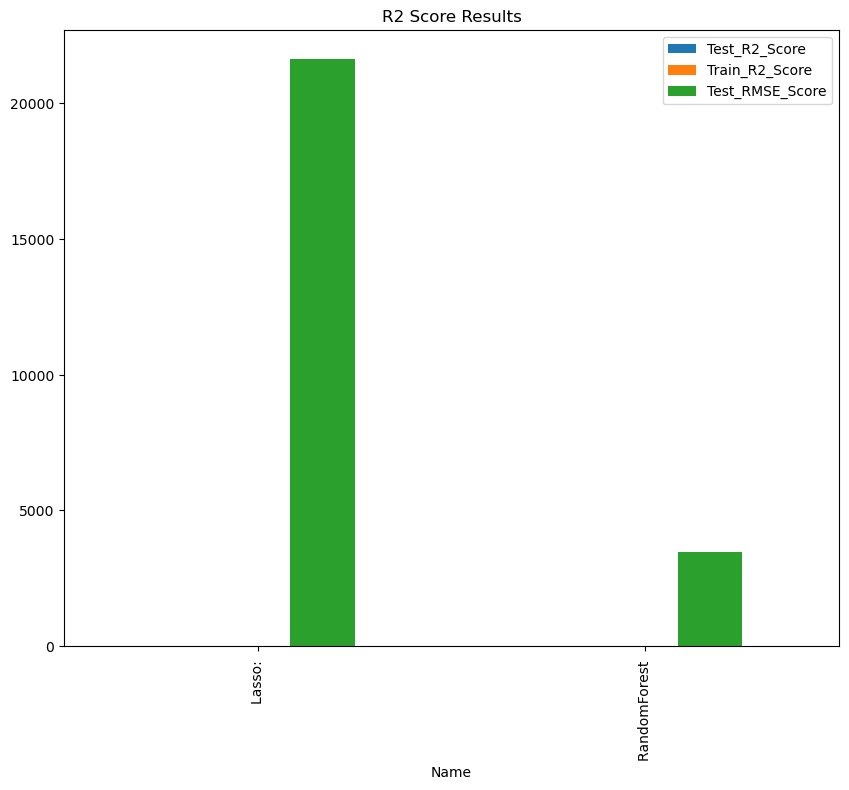

In [35]:
df_models.plot(x="Name", y=['Test_R2_Score' , 'Train_R2_Score' , 'Test_RMSE_Score'], kind="bar" , title = 'R2 Score Results' , figsize= (10,8)) ;